In [1]:
import cnotebook
import oepandas as oepd
import pandas as pd
from openeye import oechem, oedepict

# Basic Usage

**Rendering Basic Molecules**

Let's start with just viewing any object that derives from```oechem.OEMolBase``` (scroll further if you are looking for Pandas examples).

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x1180551a0> >
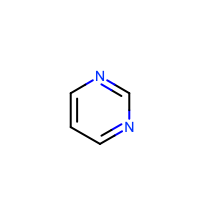

In [2]:
# Create a molecule
mol = oechem.OEGraphMol()
oechem.OESmilesToMol(mol, "n1cnccc1")

# Display the molecule
mol

How did this happen? When iPython encounters the bare ```mol``` statement, it tries to display the molecule in any way
it knows how. Usually this will just be an obscure string representation of a molecule that OpenEye provides: 
```oechem.OEGraphMol; proxy of ...```. However, CNotebook
has informed iPython on how to display molecules, so we see an image rather than that obscure string representation.


**Rendering OE2DMolDisplay Objects**

The same works with ```OE2DMolDisplay``` objects, which can include advanced rendering. For example, adding atom indices
to the depiction of the molecule that we just created:

<oedepict.OE2DMolDisplay; proxy of <Swig Object of type 'OEDepict::OE2DMolDisplay *' at 0x11ec99170> >
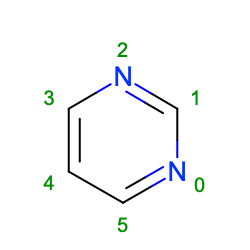

In [3]:
# Prepare the molecule for depiction
oedepict.OEPrepareDepiction(mol)

# Set the depiction options
opts = oedepict.OE2DMolDisplayOptions(250, 250, oedepict.OEScale_AutoScale)
opts.SetAtomPropertyFunctor(oedepict.OEDisplayAtomIdx())
opts.SetAtomPropLabelFont(oedepict.OEFont(oechem.OEDarkGreen))

# Create the display object
disp = oedepict.OE2DMolDisplay(mol, opts)

# Display the molecule
disp

Another popular example is to add SMARTS substructure highlighting.

<oedepict.OE2DMolDisplay; proxy of <Swig Object of type 'OEDepict::OE2DMolDisplay *' at 0x122a534b0> >
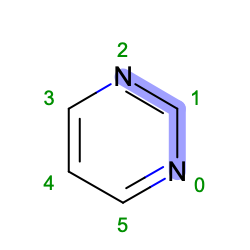

In [4]:
# Prepare the molecule for depiction
oedepict.OEPrepareDepiction(mol)

# Highlight the aromatic N-C-N in the molecule
subs = oechem.OESubSearch("ncn")
disp = oedepict.OE2DMolDisplay(mol, opts)

# Highlight all the matches in the molecule
for match in subs.Match(mol, True):
    oedepict.OEAddHighlighting(
        disp, 
        oechem.OEColor(oechem.OELightBlue),
        oedepict.OEHighlightStyle_Stick, 
        match
    )
    
# Display the molecule
disp

## Displaying Grids of Molecule

Sometimes you want to see several molecules in a grid. There is a convenient function to do this:

```python
cnotebook.render_molecule_grid(
    mols,

    # All of these parameters are optional

    scale=0.5,
    nrows=None,
    ncols=None,
    max_width=1200,
    max_columns=100,
    align=None,
    smarts=None,
    color=oechem.OEColor(oechem.OELightBlue),
    style=oedepict.OEHighlightStyle_Stick
)
```

Where:

* *mols*: One or more OpenEye molecule objects
* *scale*: (Optional) Image scale within grid
* *nrows*: (Optional) Number of rows
* *ncols*: (Optional) Number of columns
* *max_width*: (Optional) Maximum width of the image
* *max_columns*: (Optional) Maximum number of molecule columns
* *align*: (Optional) Set to True to align everything to the first molecule, or provide a reference OpenEye molecule
* *smarts*: (Optional) SMARTS highlighting (currently only supports a single highlight)
* *color*: (Optional) SMARTS highlighting color
* *style*: (Optional) SMARTS highlighting style

A few things to note:

* You cannot supply both ```nrows``` and ```ncols```.
* When ```nrows``` and ```ncols``` are None (default), the optimal number of rows and columns is calculated by the 
  maximum molecule image width and ```max_width```. Specifying a custom number of rows / columns will override
  the maximum width.

<oedepict.OEImage; proxy of <Swig Object of type 'OEDepict::OEImage *' at 0x122a52d30> >
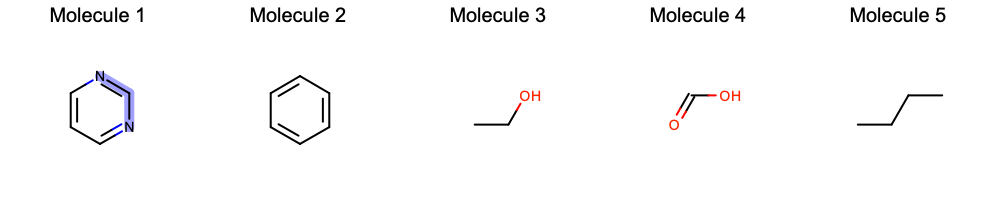

In [5]:
# Create some sample molecules
mols = []
for i, smi in enumerate(["n1cnccc1", "c1ccccc1", "CCOH", "C(=O)OH", "CCCC"]):
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, smi)
    
    # We can title them too!
    mol.SetTitle(f'Molecule {i+1}')
    
    mols.append(mol)

# Render into a grid
cnotebook.render_molecule_grid(mols, scale=1.0, smarts="ncn")

## Advanced: Changing the Rendering Options

Basic rendering of molecules within Jupyter Notebooks is controlled by a global context. For simplicity, modifying the global context affects the display of molecules both in iPython (i.e., when you display molecules as above) and in Pandas, which has not yet been introduced.

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x122a53000> >
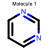

In [6]:
ctx = cnotebook.cnotebook_context.get()
ctx.height = 50
ctx.width = 50

# Display the original molecule again (but tiny)
mols[0]

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x122a53000> >
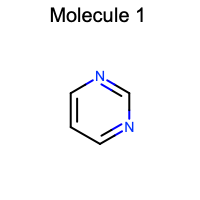

In [7]:
# Restore the settings
ctx.reset()

# Show the molecule again to prove the settings have been restored
mols[0]

By default, molecules scale with their size, meaning a really big molecule could take up the entire page. If you set a maximum height or width, you can prevent this (and the atom sizes / bond widths will scale with your molecule).

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x122a712c0> >
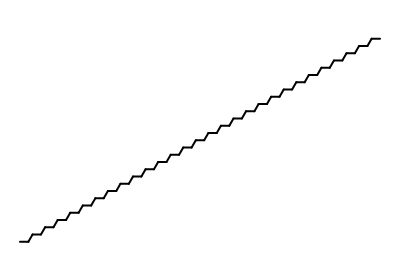

In [8]:
# Create a very long molecule - by default this much too large to render in a normal cell
long_mol = oechem.OEGraphMol()
oechem.OESmilesToMol(long_mol, "CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC")

# Change the max_width so that it fits comfortably in this notebook
ctx.max_width = 400

long_mol

In [9]:
# Reset our context so we don't affect the rest of the notebook
ctx.reset()

# Pandas Usage

Similar to the simple examples above, the idea was to develop something that "just works" in a Notebook. Most of the
time you just don't want to have to think about it.

Let's create a sample DataFrame with no molecule objects:

In [10]:
data = [
    {"Name": "Benzene", "Molecule": "c1ccccc1"},
    {"Name": "Pyridine", "Molecule": "c1cnccc1"},
    {"Name": "Pyrimidine", "Molecule": "n1cnccc1"}
]

# Create the DataFrame
df = pd.DataFrame(data)

# Display it
df

,Name,Molecule
0,Benzene,c1ccccc1
1,Pyridine,c1cnccc1
2,Pyrimidine,n1cnccc1


Now let's convert the SMILES to molecules. This is easy with a transparent extension added to Pandas by the ```OEPandas``` package:

,Name,Molecule
0,Benzene,
1,Pyridine,
2,Pyrimidine,

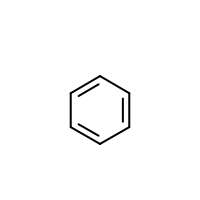
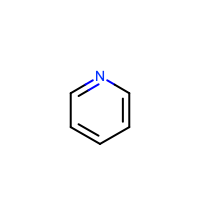
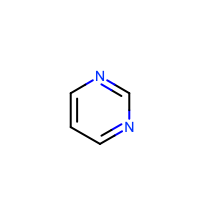

In [11]:
# Convert the Pandas series to molecules
# This can also take a list of columns to convert to molecule as well
df.as_molecule("Molecule", inplace=True)

# Display it
df

Take a look at the **dtypes** (datatypes) for the columns. You'll see that the ```Molecule``` column has dtype ```molecule```, which means that we can perform chemistry-aware operations on the column. Pretty snazzy.

In [12]:
df.dtypes

Name          object
Molecule    molecule
dtype: object

We can do things like calculate properties:

,Name,Molecule,Heavy Atom Count
0,Benzene,,6
1,Pyridine,,6
2,Pyrimidine,,6

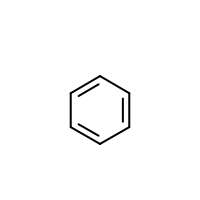
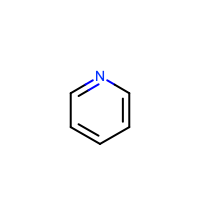
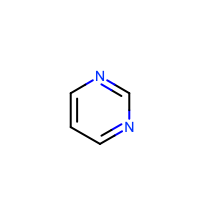

In [13]:
# Count the number of heavy atoms
df["Heavy Atom Count"] = df.Molecule.apply(lambda x: oechem.OECount(x, oechem.OEIsHeavy()))

# Display it
df

## Substructure Highlighting

We can easily highlight substructures:

,Name,Molecule,Heavy Atom Count
0,Benzene,,6
1,Pyridine,,6
2,Pyrimidine,,6

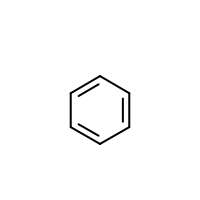
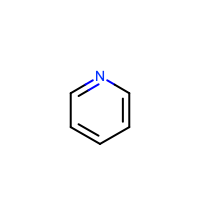
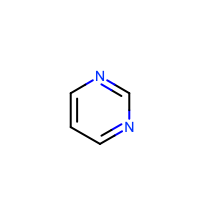

In [14]:
# Highlight aromatic N-C-N bonds
df.Molecule.highlight("ncn")

# Display it
df

Highlighting persists unless we remove it.

,Name,Molecule,Heavy Atom Count
0,Benzene,,6
1,Pyridine,,6
2,Pyrimidine,,6

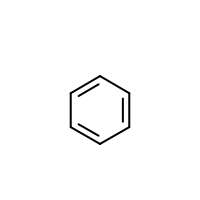
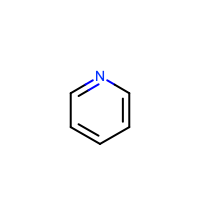
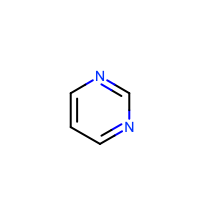

In [15]:
# Remove the highlighting (also removes any other display callbacks)
df.reset_depictions()

# Display it
df

You can also highlight based on another column. This is useful if you have different SMARTS patterns that you'd like to highlight in each molecule.

,Name,Molecule,Heavy Atom Count,SMARTS
0,Benzene,,6,cc
1,Pyridine,,6,cnc
2,Pyrimidine,,6,ncn

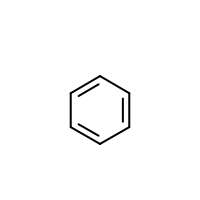
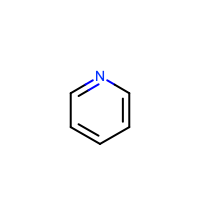
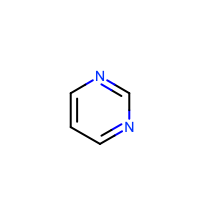

In [16]:
# Add a SMARTS column with patterns
df["SMARTS"] = pd.Series(["cc", "cnc", "ncn"], dtype=str)
df.head()

Let's highlight those patterns.

,Name,Molecule,Heavy Atom Count,SMARTS,highlighted_substructures
0,Benzene,,6,cc,
1,Pyridine,,6,cnc,
2,Pyrimidine,,6,ncn,

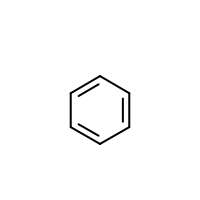
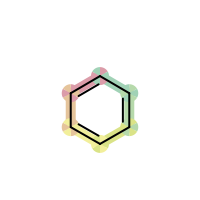
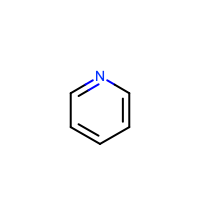
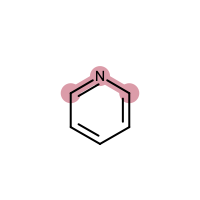
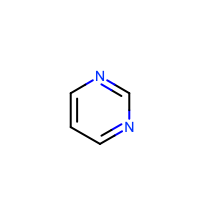
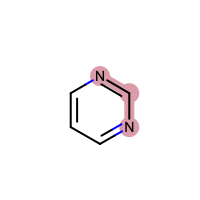

In [17]:
df.highlight_using_column("Molecule", "SMARTS", inplace=True)
df

Note that ```highlight_using_column``` produces a different kind of output column where the elements are no longer molecules (they are in fact ```oedepict.OE2DMolDisplay``` objects). This is required to enable highlighting different substructures on a per-cell basis, versus highlighting the same substructure for an entire column. You can always check the datatypes: 

In [18]:
df.dtypes

Name                           object
Molecule                     molecule
Heavy Atom Count                int64
SMARTS                         object
highlighted_substructures     display
dtype: object

# Empty Molecules

Empty molecules render an image in blue text. By default the size is 200x200 px.

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x126031530> >
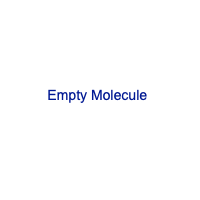

In [19]:
empty_mol = oechem.OEGraphMol()
empty_mol

# Aligned Molecule Depictions

Sometimes you may have multiple molecules in a DataFrame that you may want to have aligned. There are two options:

1. Use ```align_depictions``` and you will regenerate the 2D coordinates of the molecules in a column based on a reference.
2. Use ```highlight``` with a reference, and it will both align and highlight the molecule.

Let's first take a look at our DataFrame. See how the bicyclic pyrimidine is not always in the same orientation?

,Title,Original
0,,
1,,
2,,
3,,
4,,

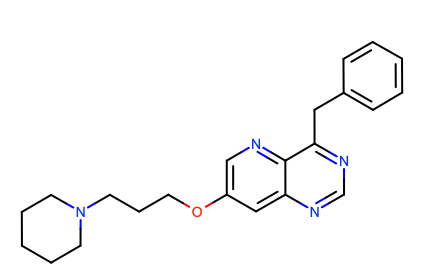
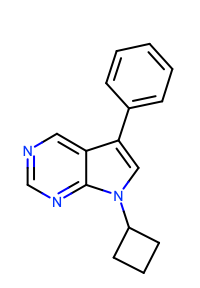
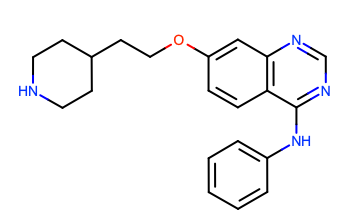
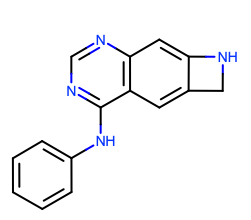
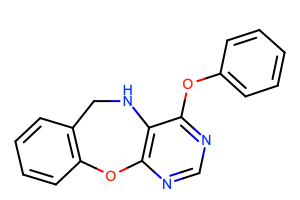

In [20]:
egfr_df = oepd.read_smi("assets/egfr.smi")
egfr_df = egfr_df.rename(columns={"Molecule": "Original"})
egfr_df.head()

Let's align based on the following template structure. This template was drawn in ChemDraw and saved as an MDL MOL file. We are going to read it in as an ```OEQMol```, which supports query features.

<oechem.OEQMol; proxy of <Swig Object of type 'OEQMolWrapper *' at 0x122a52d00> >
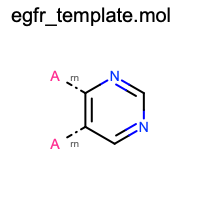

In [21]:
alignment_template = oechem.OEQMol()
with oechem.oemolistream("assets/egfr_template.mol") as ifs:
    oechem.OEReadMDLQueryFile(ifs, alignment_template)

# Show the template
alignment_template

Let's take a look at the ```align_depictions``` route, first. We're creating a new column called ```Aligned``` so that we can compare it to the original structure.

,Title,Original,Aligned
0,,,
1,,,
2,,,
3,,,
4,,,

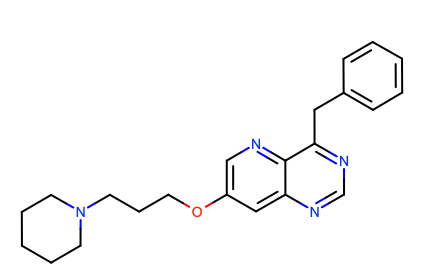
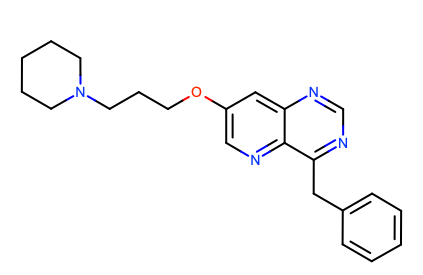
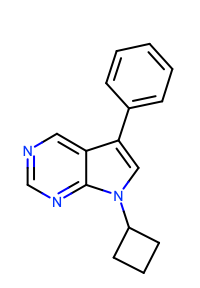
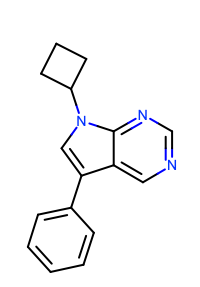
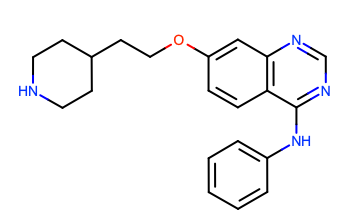
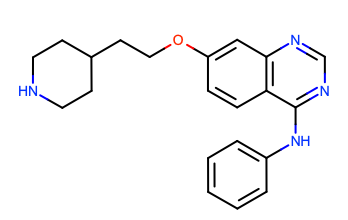
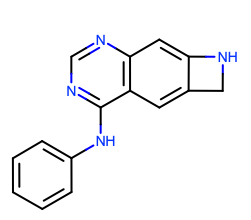
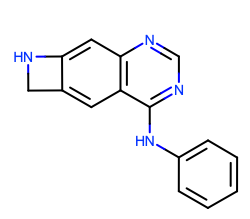
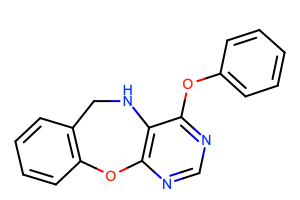
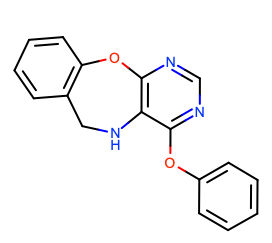

In [22]:
egfr_df["Aligned"] = egfr_df.Original.copy_molecules()
egfr_df.Aligned.align_depictions(alignment_template)
egfr_df.head()

Now lets look at the highlight route. Note that we are providing the template to the ```highlight``` function twice, once for actually highlighting the structure and once for aligning the structure. This allows you to align and highlight using different templates if you wish.

,Title,Original,Aligned,Highlighted
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,

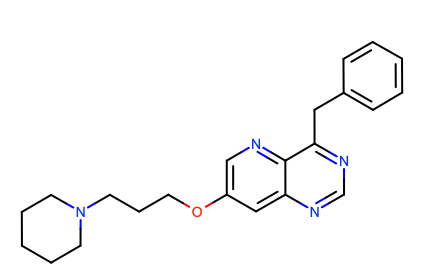
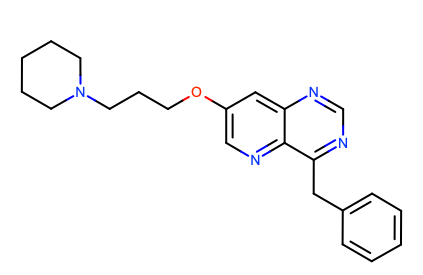
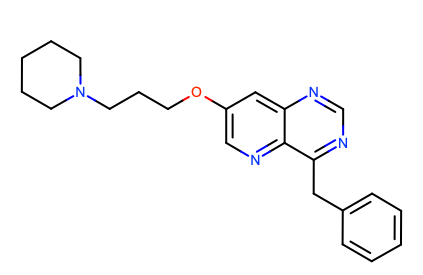
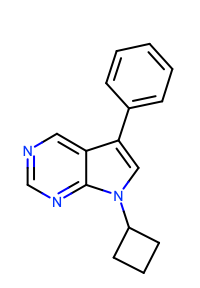
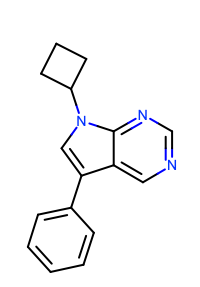
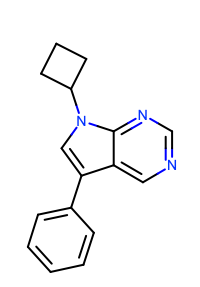
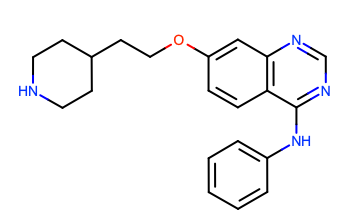
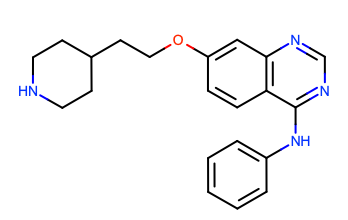
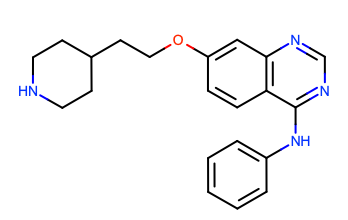
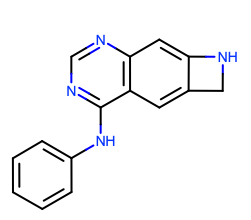
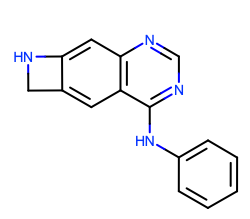
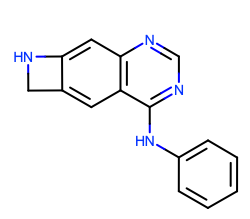
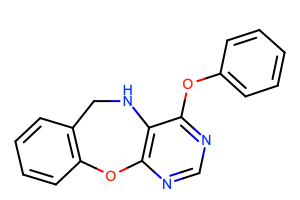
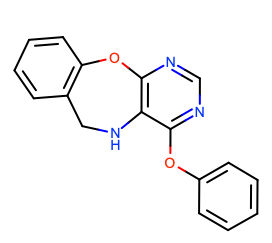
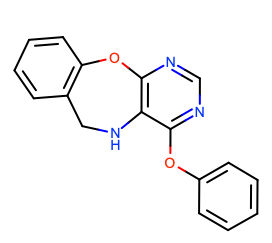

In [23]:
egfr_df["Highlighted"] = egfr_df.Original.copy_molecules()
egfr_df.Highlighted.highlight(alignment_template, ref=alignment_template)
egfr_df.head()

It should be noted that a column can only be aligned to a single reference (at the moment). Subsequent calls to functions that set an alignment reference will override previous references.

# Fingerprint Similarity

You can color the fingerprint similarity between two structures. By default, this uses OpenEye Tree fingerprints of size 4096 with default atom and bond definitions. Note that the resulting columns are ```display``` columns, so they cannot be manipulated as molecules any longer.

Note that the second argument is optional. If this argument is omitted, then the first valid molecule in the DataFrame will be used as a reference.

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x126033030> >
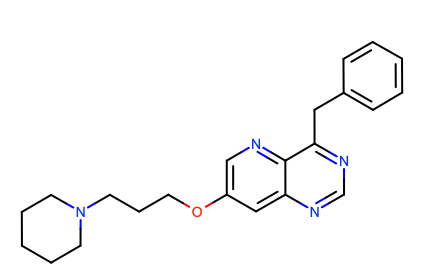

In [24]:
# Read a reference molecule
refmol = oechem.OEGraphMol()

with oechem.oemolistream("assets/egfr.smi") as ifs:
    oechem.OEReadMolecule(ifs, refmol)
    refmol.SetTitle('')

# Display it
refmol

,Title,Molecule,fingerprint_tanimoto,reference_similarity,target_similarity
0,,,1.0,,
1,,,0.15948276221752167,,
2,,,0.3316831588745117,,
3,,,0.25123152136802673,,
4,,,0.2238806039094925,,

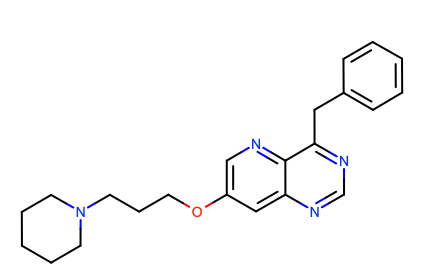
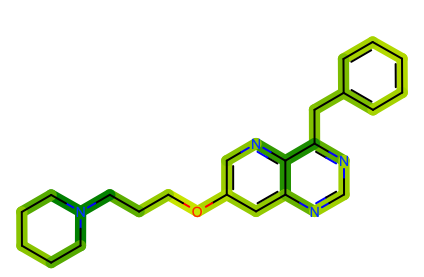
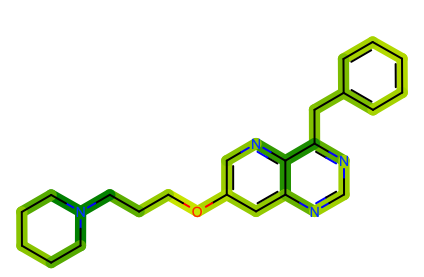
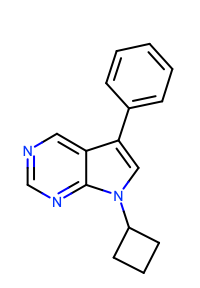
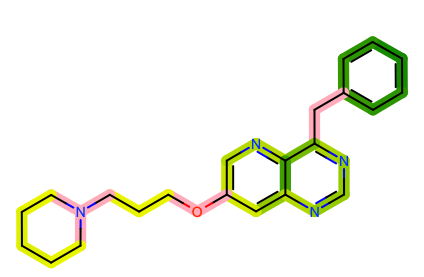
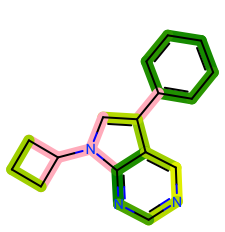
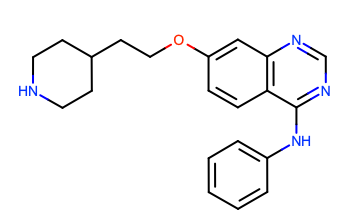
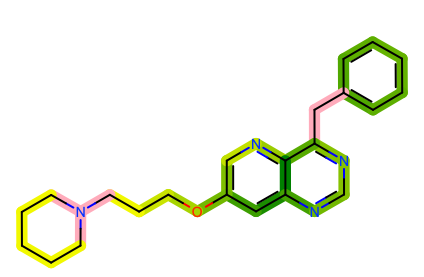
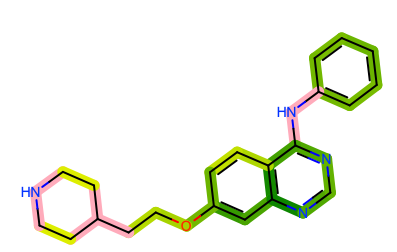
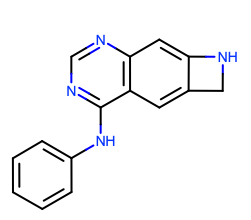
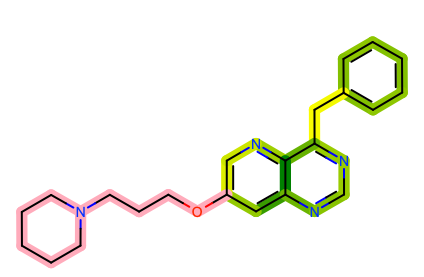
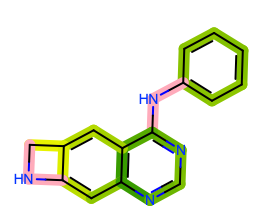
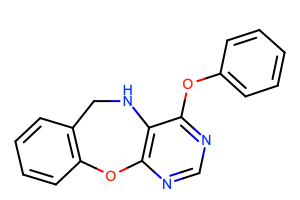
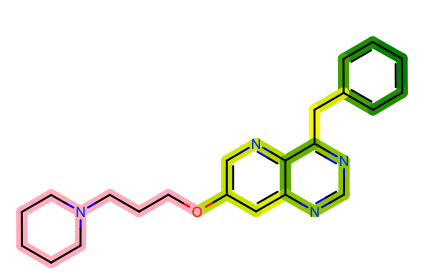
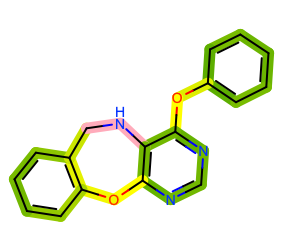

In [25]:
# Re-read the EGFR DataFrame
egfr_df = oepd.read_smi("assets/egfr.smi")

# Calculate fingerprint similarity
egfr_df.fingerprint_similarity("Molecule", refmol, inplace=True)
egfr_df.head()